In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from typing import Optional, List, Dict, Union

# graph styling
%matplotlib inline
plt.style.use('seaborn-dark')
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

## Measured velocity & filenames lookup table

In [21]:
speeds_df = pd.read_csv('Speed-Filenames.csv')
nans = speeds_df.isna().sum()

# check for missing data
for i in range(len(nans.index)):
    print(f'Column: {nans.index[i]}, Missing values: {nans[i]}')

Column: Speed, Missing values: 0
Column: Filename, Missing values: 0


In [181]:
def create_hist(data: Union[pd.Series, List], title: Optional[str] = None, xlabel: Optional[str] = None):
    '''
    plots histograms
    inputs:
        data: an array of to plot 
        title: optional string, graph title
        xlabel: optional string, x label title
    '''

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.hist(data)
    
    # add the labels & remove borders 
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.set_xlabel(xlabel)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return ax

def create_line(x: Union[pd.Series, List], y: Union[pd.Series, List], title: Optional[str] = None, 
                xlabel: Optional[str] = None, ylabel: Optional[str] = None):
    '''
    plots histograms
    inputs:
        x: an array of to plot
        y: an array of to plot
        title: optional string, graph title
        xlabel: optional string, x label title
        ylabel: optional string, y label title
    '''

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(x, y)
    
    # add the labels & remove borders
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return ax

def create_scatter(x: Union[pd.Series, List], y: Union[pd.Series, List], title: Optional[str] = None, 
                xlabel: Optional[str] = None, ylabel: Optional[str] = None):
    '''
    plots histograms
    inputs:
        x: an array of to plot
        y: an array of to plot
        title: optional string, graph title
        xlabel: optional string, x label title
        ylabel: optional string, y label title
    '''
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x, y)
    
    # add the labels & remove borders
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return ax

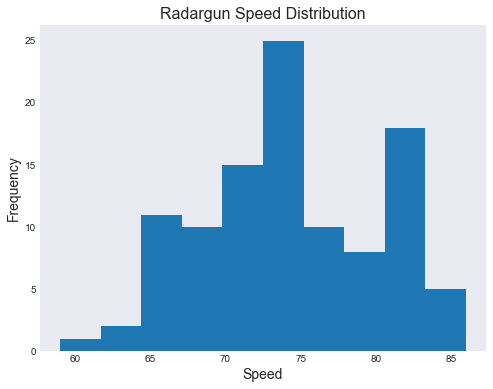

In [176]:
# distribution - radargun speeds
create_hist(speeds_df['Speed'], title='Radargun Speed Distribution', xlabel='Speed')

**Note**:
* I'm assuming the velocity was measured at the end of the alloted time frame

## IMU Data

In [103]:
# load raw imu data
path = 'raw_imu_data/'
filenames = glob.glob(f'{path}*.txt')

In [255]:
# use the first file as a playground
df = pd.read_csv(filenames[0])
df.head()

,Time_s_,Acc_x_m_s_2_,Acc_y_m_s_2_,Acc_z_m_s_2_,Gyro_x_1_s_,Gyro_y_1_s_,Gyro_z_1_s_
0,0.000,0.156587,0.335328,0.051554,-0.429806,-0.978888,-0.494023
1,0.002,0.062543,0.420723,-0.018344,-0.409490,-0.947561,-0.487375
2,0.004,-0.033180,0.507209,-0.092663,-0.385810,-0.910554,-0.480350
3,0.006,-0.130096,0.596874,-0.174642,-0.358316,-0.867007,-0.473190
4,0.008,-0.228663,0.690690,-0.266529,-0.326435,-0.815904,-0.466010


In [152]:
firstfile_nans = df.isna().sum()

# check for missing data
for i in range(len(firstfile_nans.index)):
    print(f'Column: {firstfile_nans.index[i]}, Missing values: {firstfile_nans[i]}')

Column: Time_s_, Missing values: 0
Column: Acc_x_m_s_2_, Missing values: 0
Column: Acc_y_m_s_2_, Missing values: 0
Column: Acc_z_m_s_2_, Missing values: 0
Column: Gyro_x_1_s_, Missing values: 0
Column: Gyro_y_1_s_, Missing values: 0
Column: Gyro_z_1_s_, Missing values: 0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1486 entries, 0 to 1485
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time_s_       1486 non-null   float64
 1   Acc_x_m_s_2_  1486 non-null   float64
 2   Acc_y_m_s_2_  1486 non-null   float64
 3   Acc_z_m_s_2_  1486 non-null   float64
 4   Gyro_x_1_s_   1486 non-null   float64
 5   Gyro_y_1_s_   1486 non-null   float64
 6   Gyro_z_1_s_   1486 non-null   float64
dtypes: float64(7)
memory usage: 81.4 KB


In [154]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_s_,1486.0,1.485000,0.858231,0.000000,0.742500,1.485000,2.227500,2.970000
Acc_x_m_s_2_,1486.0,17.940573,43.597727,-18.553799,-0.425822,3.677202,11.667563,268.050140
Acc_y_m_s_2_,1486.0,11.764919,23.794247,-16.290352,2.511852,4.219454,10.026491,169.443480
Acc_z_m_s_2_,1486.0,4.773545,17.226042,-21.221329,-2.702470,2.489457,7.330672,142.868650
Gyro_x_1_s_,1486.0,-1.077705,6.257901,-34.179290,-1.950228,-0.181418,1.328574,20.777670
Gyro_y_1_s_,1486.0,-0.328643,6.750688,-46.615932,-2.090666,0.811986,2.487515,14.339260
Gyro_z_1_s_,1486.0,-0.206261,5.709562,-19.947664,-1.612626,-0.241454,0.330414,36.033535


**Few things to note**:
* Author converted the accelorometer data to meters by time sequared (m/s^2)
* Author converted the gyroscope data to rad (1/s)
* 0.002 seconds intervals 
* Assuming the device is calibrated

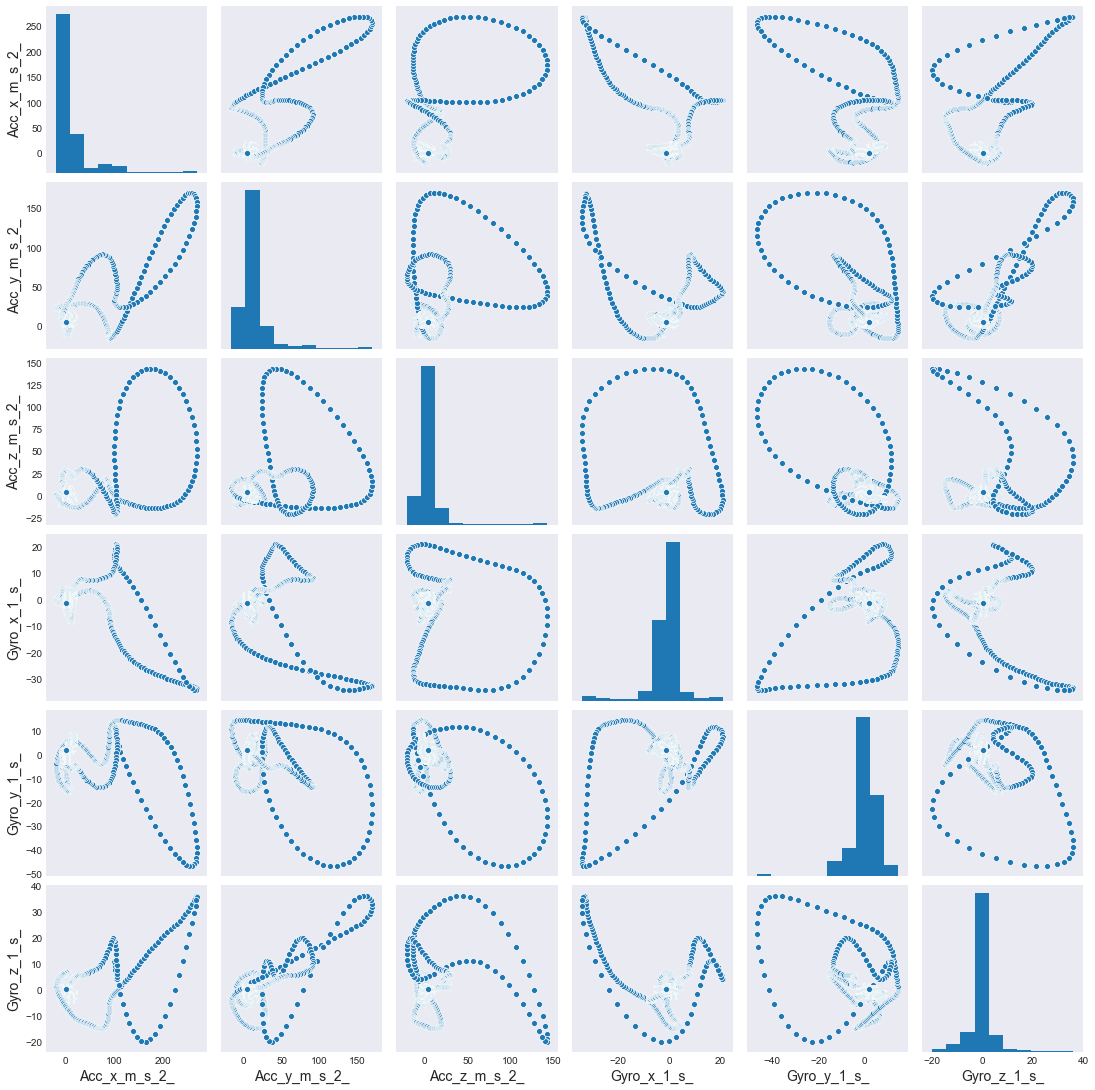

In [182]:
# distributions and pairwise relationship
columns = df.columns.tolist()
sns.pairplot(df[columns[1:]])
plt.show()

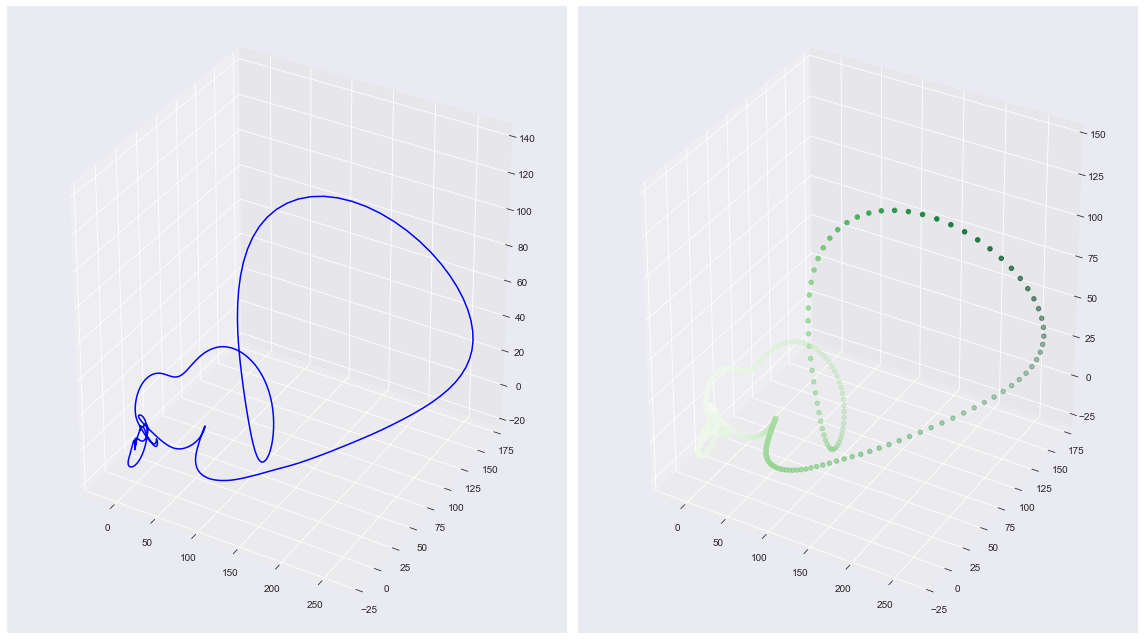

In [249]:
# the 2d relationships between the accelerations sparked my curiosity
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(16,9))

z = df[columns[3]]
x = df[columns[1]]
y = df[columns[2]]
ax = fig.add_subplot(1, 2, 1, projection='3d')
line = ax.plot3D(x, y, z, 'blue')


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(x, y, z, c=x, cmap='Greens')
plt.tight_layout()

In [254]:
df

,time,acc_x,acc_x,acc_x,gyro_x,gyro_x,gyro_x
0,0.000,0.156587,0.335328,0.051554,-0.429806,-0.978888,-0.494023
1,0.002,0.062543,0.420723,-0.018344,-0.409490,-0.947561,-0.487375
2,0.004,-0.033180,0.507209,-0.092663,-0.385810,-0.910554,-0.480350
3,0.006,-0.130096,0.596874,-0.174642,-0.358316,-0.867007,-0.473190
4,0.008,-0.228663,0.690690,-0.266529,-0.326435,-0.815904,-0.466010
...,...,...,...,...,...,...,...
1481,2.962,1.032639,4.188347,4.158706,-1.420567,1.838933,0.145531
1482,2.964,1.005449,4.185060,4.134322,-1.403813,1.839806,0.144717
1483,2.966,0.979747,4.181542,4.111501,-1.388443,1.840618,0.143986
1484,2.968,0.955362,4.177920,4.090158,-1.374453,1.841381,0.143341


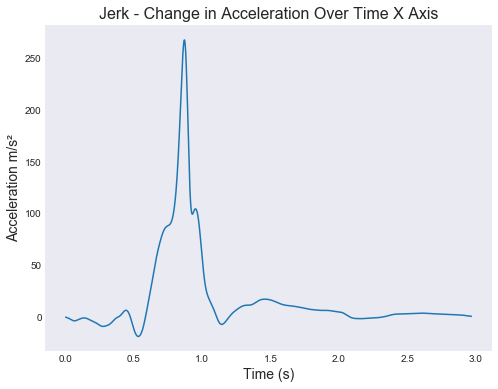

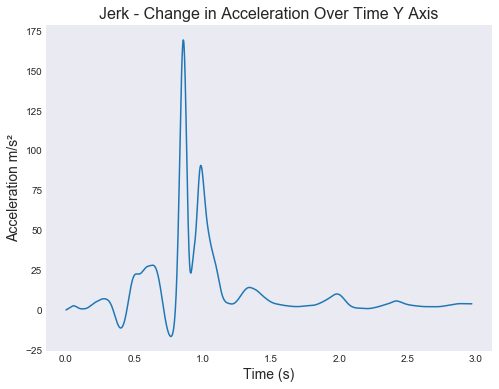

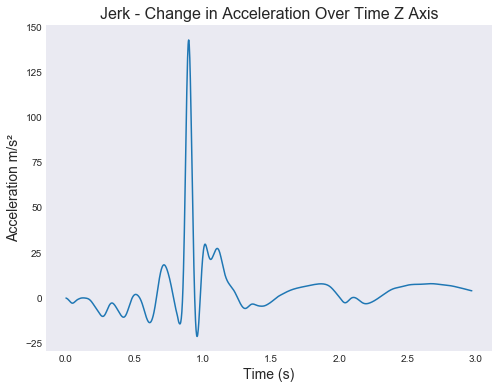

In [256]:
# lets look at change of acceleration over time in every axis
df = df.rename(columns={
    "Time_s_": "time", 
    "Acc_x_m_s_2_": "acc_x",
    "Acc_y_m_s_2_": "acc_y",
    "Acc_z_m_s_2_": "acc_z",
    "Gyro_x_1_s_": "gyro_x",
    "Gyro_y_1_s_": "gyro_y",
    "Gyro_z_1_s_": "gyro_z",
})

for axis in ['x', 'y', 'z']:
    xlabel = 'Time (s)'
    ylabel = 'Acceleration m/s\u00b2'
    title = f'Jerk - Change in Acceleration Over Time {axis.upper()} Axis'
    create_line(df['time'], df[f'acc_{axis}'], title=title, xlabel=xlabel, ylabel=ylabel)

**Note**:
* I hope the accelermoter is calibrated

## Calculate Velocity at Every Point Along the Trajectory

* The area between the axis and the acceleration function equals to the velocity 

In [257]:
from scipy.integrate import cumtrapz # intergrate trapezoidal rule
veloc_x = np.append(0.0, cumtrapz(df['acc_x'], x=df['time']))
veloc_y = np.append(0.0, cumtrapz(df['acc_y'], x=df['time']))
veloc_z = np.append(0.0, cumtrapz(df['acc_z'], x=df['time']))